[View in Colaboratory](https://colab.research.google.com/github/Dark-Sied/Word_embeddings_experiments/blob/master/H2E_classifier.ipynb)

# H2E classifier
Hinglish to English classifier using LSTM

##Uploading cleaned data and stopwords for hinglish


In [3]:
from google.colab import files
files.upload()


Saving stopwords_list.txt to stopwords_list.txt


{'stopwords_list.txt': b'ke\nka\nek\nmein\nki\nhai\nyah\naur\nse\nhain\nko\npar\niss\nhota\njo\nkar\nme\ngaya\nkarne\nkiya\nliye\napne\nne\nbani\nnahi\ntoh\nhi\nya\navam\ndiya\nho\niska\ntha\ndhvara\nhua\ntak\nsaath\nkarna\nvaale\nbaad\nliya\naap\nkuchh\nsakte\nkisi\nye\niska\nsabse\nismein\nthe\ndo\nhone\nvah\nve\nkarte\nbahut\nkaha\nvarg\nkai\nkarein\nhoti\napni\nunke\nthi\nyadi\nhui\njaa\nna\nise\nkehte\nkahte\njab\nhote\nkoi\nhue\nva\nabhi\njaise\nsabhi\nkarta\nunki\ntarah\nuss\naadi\nkul\nraha\niski\nsakta\nrahe\nunka\nissi\nrakhein\napna\npe\nuske\n'}

In [1]:
!ls

english_text (1).csv   hinglish_text.csv       stopwords_list.txt
english_text.csv       sample_data
hinglish_text (1).csv  stopwords_list (1).txt


##Importing modules

In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.optimizers import RMSprop
import random
import nltk
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import load_model
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

%matplotlib inline

Using TensorFlow backend.


In [3]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Retrieving english dataset 
Taking only 8000 sentences and neglects remaining data

In [4]:
english = pd.read_csv("english_text.csv")
new_english = english[:8000]
new_english.head()


,Unnamed: 0,text
0,0,Harry Potter and the Sorcerers Stone
1,1,CHAPTER ONE
2,2,THE BOY WHO LIVED
3,3,Mr and Mrs Dursley of number four Privet Drive...
4,4,Mr Dursley was the director of a firm called G...


##Retrieving hinglish dataset


In [5]:
hinglish = pd.read_csv("hinglish_text.csv")
hinglish.head()


,Unnamed: 0,text
0,0,ek din mujhe yunivarsal kampani ke karl laeeml...
1,1,jess robins nam ke ek yuva jo aisene kampani k...
2,2,us rat mainne robins ko dinar par aamantrit ki...
3,3,main sataven aasaman par tha prastav itana sha...
4,4,halanki mere shak ne sir uthana shuroo kar diy...


In [6]:
print("Length of english data = ", len(new_english))
print("Length of hinglish data = ", len(hinglish))

Length of english data =  8000
Length of hinglish data =  4470


##Function to remove english stopwords

In [0]:
def remove_english_stopword(text):
  stop_words = set(stopwords.words("english"))
  words = [[w for w in s.lower().split() if w not in stop_words]for s in text]
  return words 

##Fucntion to remove hinglish stopwords

In [0]:
def remove_hindi_stopwords(text):
  stop_word = []
  with open("stopwords_list.txt") as f:
    word = f.readlines()
  #   print(word)
    for i in word:
  #     print(i)
      stop_word.append(i.rstrip())
    print(stop_word)
    
    word = [[w for w in s.lower().split() if w not in stop_word]for s in text]
    return word

##Removing english stopwords

In [0]:
eng_words = remove_english_stopword(new_english["text"])

##Removing hinglish stopwords

In [16]:
hing_words = remove_hindi_stopwords(hinglish["text"])

['ke', 'ka', 'ek', 'mein', 'ki', 'hai', 'yah', 'aur', 'se', 'hain', 'ko', 'par', 'iss', 'hota', 'jo', 'kar', 'me', 'gaya', 'karne', 'kiya', 'liye', 'apne', 'ne', 'bani', 'nahi', 'toh', 'hi', 'ya', 'avam', 'diya', 'ho', 'iska', 'tha', 'dhvara', 'hua', 'tak', 'saath', 'karna', 'vaale', 'baad', 'liya', 'aap', 'kuchh', 'sakte', 'kisi', 'ye', 'iska', 'sabse', 'ismein', 'the', 'do', 'hone', 'vah', 've', 'karte', 'bahut', 'kaha', 'varg', 'kai', 'karein', 'hoti', 'apni', 'unke', 'thi', 'yadi', 'hui', 'jaa', 'na', 'ise', 'kehte', 'kahte', 'jab', 'hote', 'koi', 'hue', 'va', 'abhi', 'jaise', 'sabhi', 'karta', 'unki', 'tarah', 'uss', 'aadi', 'kul', 'raha', 'iski', 'sakta', 'rahe', 'unka', 'issi', 'rakhein', 'apna', 'pe', 'uske']


##Creating characters of words and merging both lists together

In [0]:
def create_words(hw, ew):
  ls = []
  ls1 = []

  count = 0
  for i in hing_words:
    for j in i:
      ls.append((list(j),1))
  ls = ls[:20000]    
  print("Total hinglish words = ",len(ls)) 

  for i in eng_words:
    for j in i:
      ls1.append((list(j),0))
  ls1 = ls1[:20000]    
#       count += 1   
  print("Total english words = ",len(ls1))   
  
  
  ls.extend(ls1)
  random.shuffle(ls)  
  
  return ls
    
    

##Total hinglish words = 20,000
##Total english words = 20,000

In [41]:
ls = create_words(hing_words, eng_words)

Total hinglish words =  20000
Total english words =  20000


##Creating a dictionary of alphabets for indexing the characters obtained from words

In [0]:
alpha = {"a":0,"b":1,"c":2,"d":3,"e":4,"f":5,"g":6,"h":7,"i":8,"j":9,"k":10,"l":11,"m":12,"n":13,"o":14,"p":15,"q":16,"r":17,"s":18,"t":19,"u":20,"v":21,"w":22,"x":23,"y":24,"z":25}
# alpha

##Seprating words and labels into different lists

In [0]:
words = [w[0] for w in ls]
labels = [w[1] for w in ls]

##Getting maximum length of word in the list

In [49]:
max_length = len(max(words, key = len))
max_length

62

##Splitting data into train and validation set where training data is 80% and validation data is 20%

In [0]:
train_x, test_x, train_y, test_y = train_test_split(words, labels, shuffle = True, test_size = 0.2)

##Training data = 32000
##Validation data = 8000

In [51]:
print("Train data : ", "train_X = " ,len(train_x), "labels = " , len(train_y))
print("Test data = ", "test_X = " ,len(test_x), "labels = " , len(test_y))

Train data :  train_X =  32000 labels =  32000
Test data =  test_X =  8000 labels =  8000


##Creating indexing of characters by map it to alphabets

In [0]:
#Function to create indexing of characters in the word

def create_indexing(data):
  final = []

  for i in data:
    new = []
    for j in i:
      new.append(alpha[j])
    final.append(new)  

  return final  

In [0]:
final_train = create_indexing(train_x)
final_test = create_indexing(test_x)

##Insert padding to make them of equal length

In [0]:
def create_padding(data):
  padded_docs = []
  for i in data:
    p = np.pad(i, (0, (max_length - len(i))), mode = "constant", constant_values = 0)
    padded_docs.append(p)

  return padded_docs

In [0]:
padded_train_docs = create_padding(final_train)
padded_test_docs = create_padding(final_test)

In [57]:
padded_train_docs[0]

array([13,  0,  7,  4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [58]:
print("Length of padded train data = ",len(padded_train_docs))
print("Length of padded test data = ",len(padded_test_docs))

Length of padded train data =  32000
Length of padded test data =  8000


In [59]:
padded_train_docs[0].shape

(62,)

##Applying one-hot encoding to padded docs

In [0]:
def create_encoded_docs(pad_docs, num_of_samples):
  num_alpha = 26

  encoded_docs = np.zeros((num_of_samples, max_length, num_alpha))
  print(encoded_docs.shape)

  for nu,i in enumerate(pad_docs):
    for n, j in enumerate(i):
      encoded_docs[nu][n] = to_categorical(j, num_classes = 26)

  return encoded_docs

In [61]:
encoded_train_docs = create_encoded_docs(padded_train_docs, len(padded_train_docs))
encoded_test_docs = create_encoded_docs(padded_test_docs, len(padded_test_docs))

(32000, 62, 26)
(8000, 62, 26)


##Converting labels into arrays

In [0]:
#Converting labels list into arrays
train_y = np.asarray(train_y)
test_y = np.asarray(test_y)

In [63]:
print("Train Labels shape = ",train_y.shape, "Test labels shape = ",test_y.shape)

Train Labels shape =  (32000,) Test labels shape =  (8000,)


##Creating model with one LSTM layer and two Dense layers using RMSprop optimizer

In [73]:
#Creating Model

clf = Sequential()
clf.add(LSTM(20, input_shape = (max_length, 26)))
clf.add(Dense(10,activation = "sigmoid"))
clf.add(Dense(1,activation = "relu"))

optimizer = RMSprop()
clf.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
clf.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 20)                3760      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 3,981
Trainable params: 3,981
Non-trainable params: 0
_________________________________________________________________


##Fitting the model

In [87]:
history = clf.fit(encoded_train_docs, train_y, epochs = 5, batch_size = 32, validation_data = (encoded_test_docs, test_y))

Train on 32000 samples, validate on 8000 samples
Epoch 1/5
32000/32000 [==============================] - 184s 6ms/step - loss: 0.3704 - acc: 0.8563 - val_loss: 0.3461 - val_acc: 0.8660
Epoch 2/5
32000/32000 [==============================] - 183s 6ms/step - loss: 0.3638 - acc: 0.8669 - val_loss: 0.3424 - val_acc: 0.8745
Epoch 3/5
32000/32000 [==============================] - 218s 7ms/step - loss: 0.3448 - acc: 0.8775 - val_loss: 0.3213 - val_acc: 0.8806
Epoch 4/5
32000/32000 [==============================] - 220s 7ms/step - loss: 0.3336 - acc: 0.8856 - val_loss: 0.3454 - val_acc: 0.8794
Epoch 5/5
32000/32000 [==============================] - 197s 6ms/step - loss: 0.3235 - acc: 0.8902 - val_loss: 0.3259 - val_acc: 0.8911


##Save the model 

In [0]:
clf.save("my_best_model.h5")

##Load model

In [0]:
model = load_model("my_best_model.h5")

##Function for making predictions

In [0]:
def predict(test_str):
  test_words = word_tokenize(test_str)
  test_char = []
  for i in test_words:
    test_char.append(list(i.lower()))
    
  test_index = create_indexing(test_char)
#   print(test_index)
  
  test_pad = create_padding(test_index)
  
  test_encode = create_encoded_docs(test_pad, len(test_pad))
  
  res = model.predict_classes(test_encode)
  
  return (res)
  

##Testing our model using a sentence 
Getting results word wise

In [106]:
result = predict("mujhe agle hafte Amsterdam jana hai")
print(result)

(6, 62, 26)
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]]


In [96]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

##Comparison training accuracy and validation accuracy

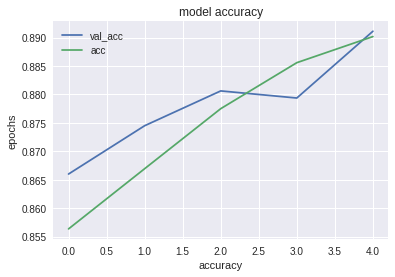

In [103]:
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
acc = history.history["acc"]

epochs = [i for i in range(len(loss))]

plt.plot(val_acc)
plt.plot(acc)
plt.title("model accuracy")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.legend(["val_acc","acc"])
plt.show()

##Comparing training loss and validation loss

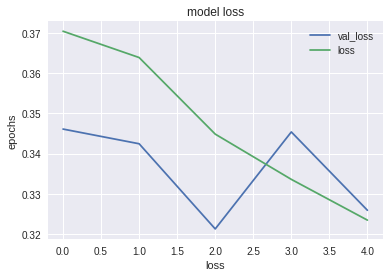

In [104]:
plt.plot(val_loss)
plt.plot(loss)
plt.title("model loss")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.legend(["val_loss","loss"])
plt.show()